# Deep Learining

### **Handwritten Digit Recognition using Neural Networks**  

This project implements a **Neural Network from scratch** (without using TensorFlow or PyTorch) to recognize handwritten digits from the **MNIST dataset**. It involves:  

- **Building a Multi-Layer Perceptron (MLP)** with forward and backward propagation.  
- **Training the model** using gradient descent and backpropagation.  
- **Manually loading and preprocessing the MNIST dataset** without external deep learning libraries.  

The goal is to gain a deeper understanding of how neural networks work at a fundamental level. 🚀


In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 


In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.head()


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [7]:
data =  np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255

In [8]:
data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255
_,m_train = X_train.shape


In [9]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [10]:
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

In [11]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [12]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [13]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[1 1 1 ... 1 3 4] [3 1 2 ... 7 6 7]
0.13541463414634147
Iteration:  10
[2 1 9 ... 9 4 6] [3 1 2 ... 7 6 7]
0.21595121951219512
Iteration:  20
[2 1 2 ... 9 4 6] [3 1 2 ... 7 6 7]
0.2927560975609756
Iteration:  30
[8 1 2 ... 7 6 4] [3 1 2 ... 7 6 7]
0.35753658536585364
Iteration:  40
[1 1 2 ... 7 6 4] [3 1 2 ... 7 6 7]
0.41224390243902437
Iteration:  50
[3 1 2 ... 7 6 4] [3 1 2 ... 7 6 7]
0.45290243902439026
Iteration:  60
[3 1 2 ... 7 6 4] [3 1 2 ... 7 6 7]
0.48790243902439023
Iteration:  70
[3 1 2 ... 7 6 4] [3 1 2 ... 7 6 7]
0.5207073170731708
Iteration:  80
[3 1 2 ... 7 6 7] [3 1 2 ... 7 6 7]
0.5487317073170732
Iteration:  90
[3 1 2 ... 7 6 7] [3 1 2 ... 7 6 7]
0.5746097560975609
Iteration:  100
[3 1 2 ... 7 6 7] [3 1 2 ... 7 6 7]
0.598780487804878
Iteration:  110
[3 1 2 ... 7 6 7] [3 1 2 ... 7 6 7]
0.6186585365853658
Iteration:  120
[3 1 2 ... 7 6 7] [3 1 2 ... 7 6 7]
0.6377317073170732
Iteration:  130
[3 1 2 ... 7 6 7] [3 1 2 ... 7 6 7]
0.6555853658536586
Iteration:  

In [14]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


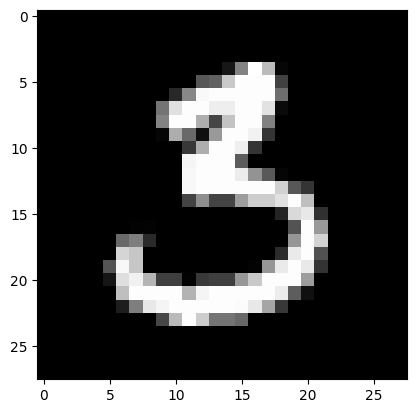

Prediction:  [1]
Label:  1


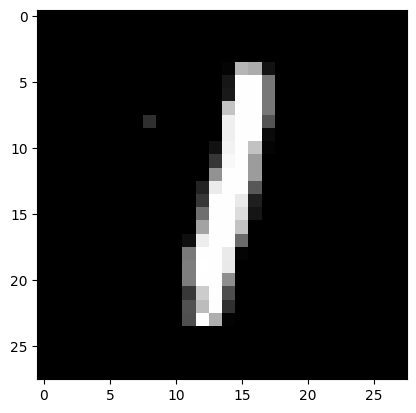

Prediction:  [2]
Label:  2


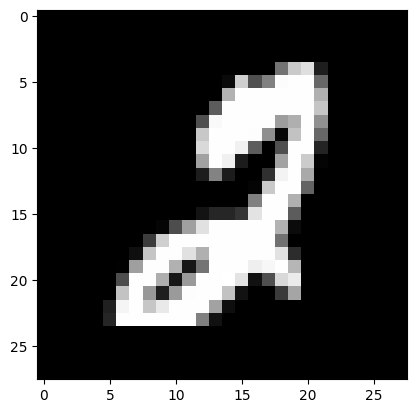

Prediction:  [4]
Label:  4


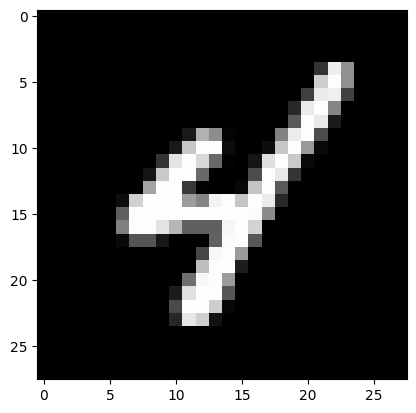

In [15]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [16]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 5 9 0 2 4 7 4 3 4 3 2 6 7 7 8 6 3 4 5 6 8 5 4 9 8 6 6 6 7 3 0 2 1 0 4 3
 4 0 1 4 6 0 7 7 4 9 1 0 0 4 1 2 2 1 8 0 6 4 2 2 1 4 2 2 7 6 8 7 6 7 2 3 1
 4 3 0 2 5 2 8 5 8 1 8 8 9 1 6 4 4 0 1 1 6 8 2 2 2 6 8 2 9 3 7 2 8 1 5 7 4
 6 9 4 1 1 8 8 5 3 3 8 9 9 0 1 3 0 2 9 1 5 4 5 4 3 7 1 8 6 4 1 0 7 3 5 0 4
 4 6 3 6 3 9 0 0 1 5 6 9 0 8 5 1 0 4 6 7 2 2 7 1 4 0 3 6 2 1 9 5 9 7 1 3 9
 6 3 0 1 3 6 8 4 3 7 5 9 8 7 0 5 9 9 0 5 2 7 4 7 7 4 2 6 5 4 1 4 9 9 6 6 9
 6 5 4 8 2 9 1 3 4 9 3 2 1 5 3 0 9 7 6 4 7 3 9 0 5 5 7 4 5 0 9 6 2 6 6 3 8
 2 8 0 6 2 2 5 6 5 4 8 2 5 4 1 9 3 1 9 8 3 9 4 7 5 8 4 5 4 5 7 9 4 5 1 2 2
 2 4 5 7 9 9 1 9 3 5 1 1 5 3 0 4 5 4 8 9 0 7 0 0 5 9 8 8 0 1 5 5 7 2 8 1 6
 5 0 8 4 3 7 8 4 6 2 5 0 1 1 9 9 0 8 3 1 1 9 9 8 1 7 8 1 1 3 7 4 8 9 6 5 0
 1 9 9 5 8 3 0 8 5 6 1 8 9 3 3 9 9 0 5 8 0 8 9 5 0 7 4 8 8 4 2 8 3 8 2 7 6
 6 4 0 9 8 6 8 1 1 2 8 3 9 7 1 0 0 2 8 9 7 2 5 6 2 5 1 1 8 0 4 8 8 1 8 0 4
 7 1 9 4 2 4 7 1 3 9 3 8 8 0 4 4 0 4 8 9 8 7 5 5 3 2 1 1 4 6 6 9 7 2 8 8 4
 1 4 3 8 2 6 2 0 5 4 1 0 

0.836

Accuracy of this model is 83% which is pretty good.